In [94]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Input,Flatten, Conv2D
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [95]:
inputs=Input((1,))
x=Dense(32,activation='relu')(inputs)
x=Dense(64,activation='relu')(x)
x=Dense(128,activation='relu')(x)
outputs=Dense(1,name='output_layer',activation='linear')(x)
dnn_model=Model(inputs=inputs,outputs=outputs,name='dnn_model')
dnn_model.summary()


Model: "dnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
x=np.random.uniform(-20,20,1000).reshape(-1,1)
y=5*pow(x,3)-10*pow(x,2)-20*x+10

#print some values
print(x[:10])
print(y[:10])

[[  9.4845957 ]
 [ 16.53853646]
 [  8.46814316]
 [  0.78563251]
 [  7.52901779]
 [ -8.18361896]
 [-13.21665144]
 [-14.90173515]
 [  6.20602903]
 [ 14.06344912]]
[[ 3.18678776e+03]
 [ 1.95623635e+04]
 [ 2.15977203e+03]
 [-9.46030025e+00]
 [ 1.42651217e+03]
 [-3.23639488e+03]
 [-1.30158808e+04]
 [-1.84581064e+04]
 [ 6.95851178e+02]
 [ 1.16583121e+04]]


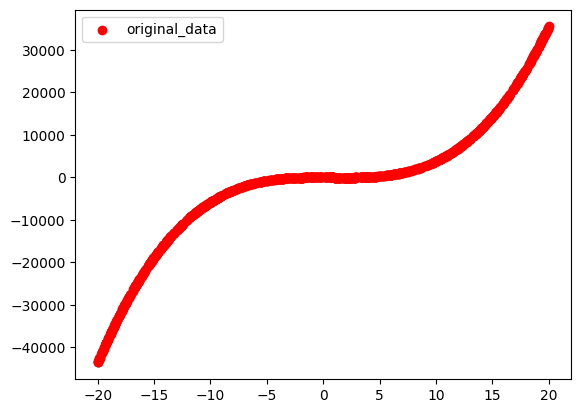

In [97]:
plt.scatter(x,y,color='red',label='original_data')
plt.legend()

In [98]:
#normalize x to range [-1,1]
x_normalized=2*(x-np.min(x))/(np.max(x)-np.min(x))-1
y_normalized=2*(y-np.min(y))/(np.max(y)-np.min(y))-1
print(x_normalized[:10])
print(y_normalized[:10])

[[ 0.47474296]
 [ 0.82767444]
 [ 0.42388655]
 [ 0.03950569]
 [ 0.37689907]
 [-0.40925498]
 [-0.66107388]
 [-0.74538407]
 [ 0.31070567]
 [ 0.70383782]]
[[ 0.18205224]
 [ 0.59639098]
 [ 0.15606644]
 [ 0.10118   ]
 [ 0.13751332]
 [ 0.01953133]
 [-0.22791157]
 [-0.36561206]
 [ 0.11902596]
 [ 0.39640078]]


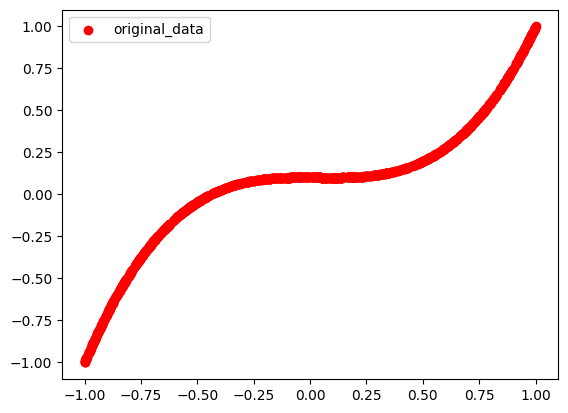

In [99]:
plt.scatter(x_normalized,y_normalized,color='red',label='original_data')
plt.legend()

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_normalized,y_normalized,test_size=0.05,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.05,random_state=42)
print(x_tarin.shape,x_val.shape,y_train.shape,y_val.shape)

(950, 1) (50, 1) (950, 1) (50, 1)
(361,) (48, 1) (902, 1) (48, 1)


In [101]:
dnn_model.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.R2Score(name='accuracy')])
history=dnn_model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3482 - loss: 0.1008 - val_accuracy: 0.8619 - val_loss: 0.0316
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8495 - loss: 0.0246 - val_accuracy: 0.9093 - val_loss: 0.0208
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9046 - loss: 0.0168 - val_accuracy: 0.9426 - val_loss: 0.0131
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9525 - loss: 0.0077 - val_accuracy: 0.9772 - val_loss: 0.0052
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0033 - val_accuracy: 0.9897 - val_loss: 0.0024
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9898 - loss: 0.0017 - val_accuracy: 0.9951 - val_loss: 0.0011
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9940 - loss: 9.0210e-04 - val_accuracy: 0.9971 - val_loss: 6.7233e-04
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9962 - loss: 6.4005e-04 - val_accuracy: 0.997

# **Plot training accuracy vs validation Accuracy**

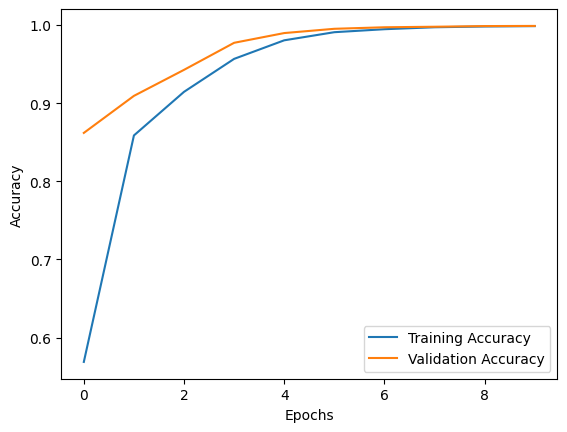

In [102]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Plot training loss vs Validation loss**

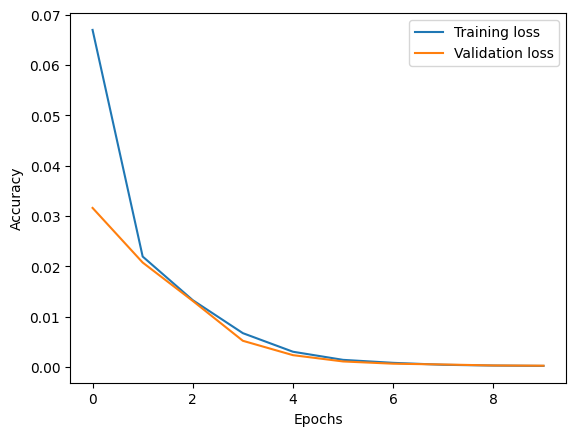

In [103]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

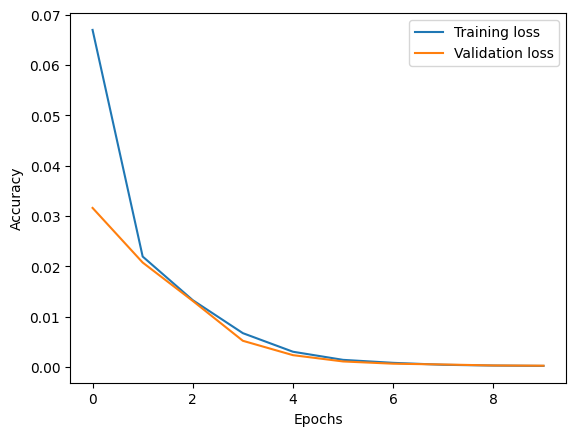

In [104]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **use Test data for prediction**

In [105]:
y_test_predict=dnn_model.predict(x_test)
#y_test_predict

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


# **Denormalize true value**

In [109]:
x_true=((x_test+1)*(np.max(x)-np.min(x))/2)+np.min(x)
y_true=((y_test+1)*(np.max(y)-np.min(y))/2)+np.min(y)
print(x_true[:10])
print(y_true[:10])

[[-18.86145863]
 [ 19.55483514]
 [ 18.70786758]
 [ -9.1517508 ]
 [-15.40433387]
 [ -1.98485754]
 [  4.63322733]
 [  5.7926774 ]
 [  0.29090501]
 [  6.45908761]]
[[-3.67205725e+04]
 [ 3.31830088e+04]
 [ 2.88733001e+04]
 [-4.47701392e+03]
 [-2.03315900e+04]
 [-2.87977576e+01]
 [ 1.99970217e+02]
 [ 5.30465016e+02]
 [ 3.45873286e+00]
 [ 8.10979750e+02]]


In [113]:
y_pred=dnn_model.predict(x_test)
y_pred_true=((y_pred+1)*(np.max(y)-np.min(y))/2)+np.min(y)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[-0.80856085]
 [ 0.9011685 ]
 [ 0.8230842 ]
 [-0.0036105 ]
 [-0.41587335]
 [ 0.10682621]
 [ 0.11528246]
 [ 0.12435091]
 [ 0.10741156]
 [ 0.13224766]]


# **Plot Predction accuracy vs true value accuracy**

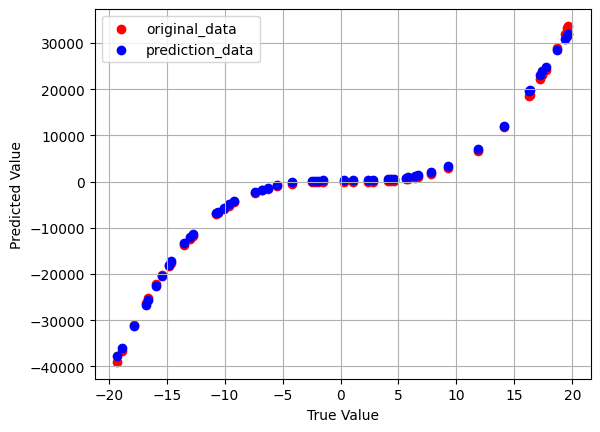

In [115]:
plt.scatter(x_true,y_true,color='red',label='original_data')
plt.scatter(x_true,y_pred_true,color='blue',label='prediction_data')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid()
plt.show()